**BINARY CLASSIFICATION OF HUMAN BLOOD CELLS TO DETECT INFECTION WITH MALARIA PARASITE OR OTHERWISE USING CONVOLUTIONAL NEURAL NETWORK**

Malaria is a life-threatening disease caused by parasites that are transmitted to people through the bites of infected female Anopheles mosquitoes.
It is preventable and curable.
In 2018, there were an estimated 228 million cases of malaria worldwide.
The estimated number of malaria deaths stood at 405 000 in 2018.
Children aged under 5 years are the most vulnerable group affected by malaria;
in 2018, they accounted for 67% (272 000) of all malaria deaths worldwide.
The WHO African Region carries a disproportionately high share of the global malaria burden.
In 2018, the region was home to 93% of malaria cases and 94% of malaria deaths.

The WHO African Region continues to carry a disproportionately high share of the global malaria burden. In 2023 the Region was home to about 94% of all malaria cases and 95% of deaths. Children under 5 years of age accounted for about 76% of all malaria deaths in the Region.

Over half of these deaths occurred in four countries: Nigeria (30.9%), the Democratic Republic of the Congo (11.3%), Niger (5.9%) and United Republic of Tanzania (4.3%).

This project focuses on the use of Artificial Intelligence, specifically Computer Vision to create a model that helps to detect malaria parasites in the human body by classifying the blood cells as 'Parasite_infected' or 'uninfected'. This model further underscores the merits that AI brings into the health sector; helping to reduce timetaken to detect malaria. Thus aiding faster treatment and reducing the number of death due to malaria.


**IMPORTING LIBRARIES**

In [2]:
import kagglehub

dataset_path = kagglehub.dataset_download('meetnagadia/malaria-dataset')

print('Data source import complete.')

Data source import complete.


In [3]:
!ls /kaggle/input/malaria-dataset/Dataset

Test  Train


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

In [5]:
dataset_path = "/kaggle/input/malaria-dataset/Dataset"

# Adjust the directory paths based on the structure of the plant seedling dataset
train_dir = os.path.join(dataset_path, "Train")
test_dir  = os.path.join(dataset_path, "Test")

image_size = (224, 224)  # adjust if needed
batch_size = 32

In [6]:


# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    image_size=image_size,
    batch_size=batch_size,
     shuffle=True
)

# Load test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size
)


Found 416 files belonging to 2 classes.
Found 134 files belonging to 2 classes.


Classes: ['Parasite', 'Uninfected']


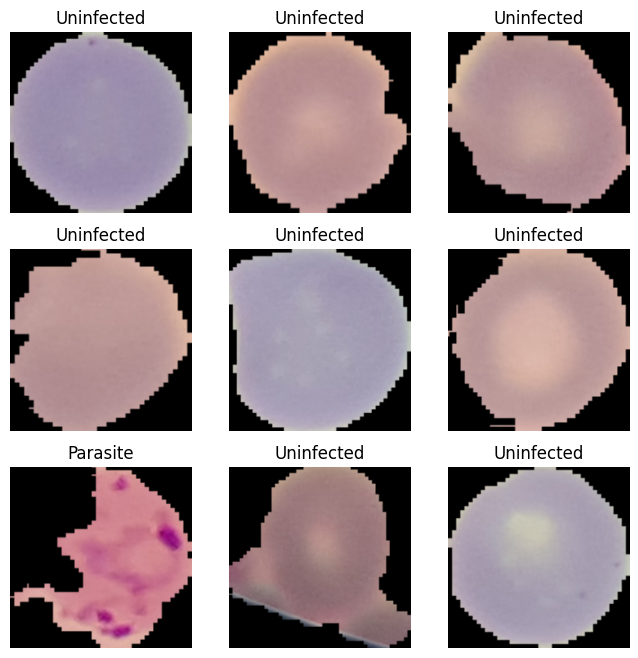

In [7]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names
print("Classes:", class_names)

# Show a 3x3 grid from the first batch
for images, labels in train_ds.take(1):
    plt.figure(figsize=(8,8))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
    plt.show()

**DATA AUGMENTATION**

In [8]:
# Data augmentation for the training dataset
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

**DATA PROCESSING**

In [9]:
# Preprocess and augment the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 416 images belonging to 2 classes.


In [10]:
# Preprocess the test
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 134 images belonging to 2 classes.


**CREATE A CNN MODEL**

In [11]:
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(2, activation='softmax')(x)

model = Model(base_model.input, x)
model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             

 Total params: 32,870,978 (125.39 MB)

 Trainable params: 12,846,594 (49.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

**COMPILE & TRAIN MODEL**

In [12]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,validation_data= test_generator,validation_steps=len(test_generator), epochs=35)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5097 - loss: 4.5978 - val_accuracy: 0.3731 - val_loss: 1.6889
Epoch 2/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 591ms/step - accuracy: 0.6034 - loss: 1.2059 - val_accuracy: 0.6045 - val_loss: 0.6915
Epoch 3/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 613ms/step - accuracy: 0.6529 - loss: 0.7580 - val_accuracy: 0.5672 - val_loss: 0.7616
Epoch 4/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 615ms/step - accuracy: 0.7146 - loss: 0.5746 - val_accuracy: 0.7015 - val_loss: 0.5796
Epoch 5/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 553ms/step - accuracy: 0.7149 - loss: 0.5627 - val_accuracy: 0.7836 - val_loss: 0.5101
Epoch 6/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 625ms/step - accuracy: 0.7412 - loss: 0.5093 - val_accuracy: 0.7463 - val_loss: 0.4775
Epoch 7/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 596ms/step - accuracy: 0.7265 - loss: 0.5254 - val_accuracy: 0.5672 - val_loss: 0.7279
Epoch 8/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 561ms/step - accuracy: 0.7407 - loss: 0.5090 - val_accuracy: 0.7

In [13]:
train_generator.class_indices

{'Parasite': 0, 'Uninfected': 1}

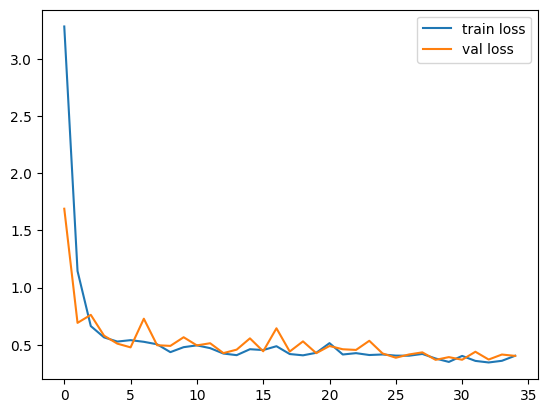

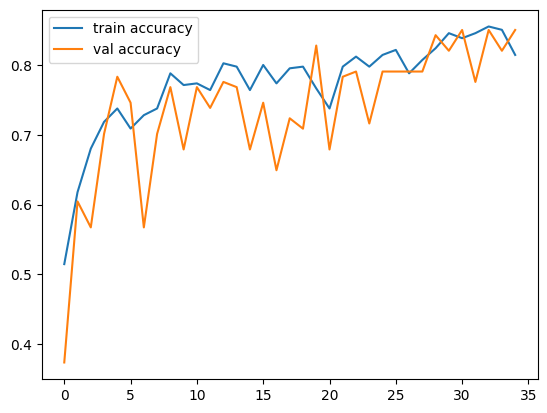

<Figure size 640x480 with 0 Axes>

In [15]:
#plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('Lossval_loss')

#plot the accuracy
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy')

**EVALUATE & SAVE THE MODEL**

In [16]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.8470 - loss: 0.3994
Test accuracy: 85.07%


In [17]:
# Save the model
model.save('/content/sample_data/cnn_model.h5')

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image  # ok on Kaggle

# Create reverse mapping {0: 'Parasite', 1: 'Uninfected'}
labels = {v: k for k, v in train_generator.class_indices.items()}

def predict_image(model, image_path, target_size=image_size):
    """
    Predicts class of a given image.

    Args:
        model: trained keras model
        img_path: path to image file
        target_size: size to resize the image (should match training size)

    Returns:
        predicted_class (str), confidence (float)
    """
    # Load and preprocess image
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # normalize like training
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

    # Get prediction
    preds = model.predict(img_array)
    pred_class_idx = np.argmax(preds, axis=1)[0]
    confidence = preds[0][pred_class_idx]

    return labels[pred_class_idx], confidence


In [32]:
image_path = '/kaggle/input/malaria-dataset/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_19.png'

predicted_class, confidence = predict_image(model, image_path)
print(f"Prediction: {predicted_class} ({confidence*100:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction: Uninfected (62.80%)


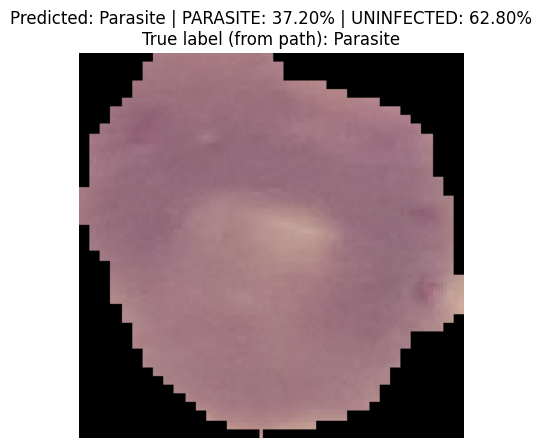

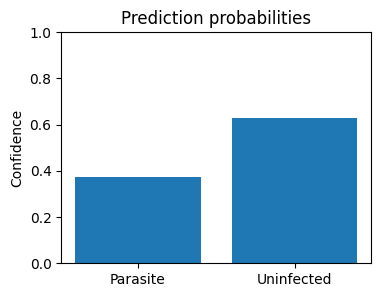

In [38]:
# --- load image ---
pil_img = image.load_img(image_path, target_size=image_size)  # RGB by default
img_arr = image.img_to_array(pil_img)                         # [H,W,3], 0..255
img_disp = img_arr.astype("uint8")                            # for plotting

# --- preprocess (match your training!) ---
x = np.expand_dims(img_arr, axis=0).astype("float32")
x = x / 255.0  # ⚠️ remove this line if your model already includes a Rescaling layer or uses a specific preprocess_input

# --- predict ---
pred = model.predict(x, verbose=0)[0]
# Handle binary (sigmoid) vs softmax(2)
if model.output_shape[-1] == 1:        # e.g., (None, 1)
    prob_parasite = float(pred.squeeze())
    prob_uninfected = 1.0 - prob_parasite
else:                                   # e.g., (None, 2)
    prob_uninfected = float(pred[1])
    prob_parasite = float(pred[0])


pred_label = class_names[int(prob_parasite >= 0.5)]
true_label = os.path.basename(os.path.dirname(image_path))

# --- show image with prediction ---
plt.figure(figsize=(5,5))
plt.imshow(img_disp.astype("uint8"))
plt.axis('off')
plt.title(
    f"Predicted: {pred_label} | PARASITE: {prob_parasite:.2%} | UNINFECTED: {prob_uninfected:.2%}\n"
    f"True label (from path): {true_label}"
)
plt.show()


# (optional) probability bar chart
plt.figure(figsize=(4,3))
plt.bar(class_names, [prob_parasite, prob_uninfected ])
plt.ylim(0, 1)
plt.title("Prediction probabilities")
plt.ylabel("Confidence")
plt.show()

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
